# Comprehensive Analysis and Trend Evaluation of Medical Device Recalls

## Analysis 1: Frequency Analysis and Visualization of Most Common Causes of Medical Device Recalls

### Hunter Belous, Jared Fox, Asad Kamal

#### Dataset and Library Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.graph_objects as go

# Read the Excel file into a DataFrame.

file_path = r'C:\Users\akama\Documents\SIADS593\dataset_merged.xlsx'
df = pd.read_excel(file_path)

In [2]:
# Verify first few rows of the DataFrame. There should be around 9,000 records from the final merged and cleaned dataset.

print('DataFrame Shape:',df.shape)
df.head()

DataFrame Shape: (9067, 42)


,id_x,action_summary,authorities_link,country_x,date,determined_cause,icij_notes,number_x,reason,source_x,...,manufacturer_id,created_at_y,updated_at_y,id,name_y,parent_company,slug,source_y,created_at,updated_at
0,91,No Summary,https://www.invima.gov.co/,COL,2017-05-30,Unknown Cause,Colombian data is current through June 2019. A...,2007DM-0001180,The manufacturer reports that it has detected ...,National Institute of Drugs and Food Surveilla...,...,72,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC,72,3M Canada Company || 3M Health Care,3m Company,national-institute-of-drugs-and-food-surveilla...,National Institute of Drugs and Food Surveilla...,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC
1,92,No Summary,https://www.invima.gov.co/,COL,2017-10-31,Unknown Cause,Colombian data is current through June 2019. A...,2014DM-0011649,The manufacturer has confirmed that the detect...,National Institute of Drugs and Food Surveilla...,...,73,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC,73,3M Company || 3M Health Care,3m Company,national-institute-of-drugs-and-food-surveilla...,National Institute of Drugs and Food Surveilla...,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC
2,93,No Summary,https://www.invima.gov.co/,COL,2017-07-13,Unknown Cause,Colombian data is current through June 2019. A...,2012DM-0008507,The manufacturer has identified a quality prob...,National Institute of Drugs and Food Surveilla...,...,74,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC,74,3M Espe Dental Products || 3M Deutschland Gmbh...,3m Company,national-institute-of-drugs-and-food-surveilla...,National Institute of Drugs and Food Surveilla...,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC
3,94,No Summary,https://www.invima.gov.co/,COL,2015-10-29,Unknown Cause,Colombian data is current through June 2019. A...,2010DM-0005465,The manufacturer states that the operation of ...,National Institute of Drugs and Food Surveilla...,...,75,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC,75,3M Health Care,3m Company,national-institute-of-drugs-and-food-surveilla...,National Institute of Drugs and Food Surveilla...,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC
4,95,No Summary,https://www.invima.gov.co/,COL,2016-12-12,Unknown Cause,Colombian data is current through June 2019. A...,INVIMA 2011RD-0002106,ABBOTT has identified a problem of specific st...,National Institute of Drugs and Food Surveilla...,...,76,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC,76,ABBOTT GMBH & CO. KG CON DOMICILIO EN |...,Abbott Laboratories,national-institute-of-drugs-and-food-surveilla...,National Institute of Drugs and Food Surveilla...,2022-08-04 08:28:02 UTC,2022-08-04 08:28:02 UTC


### Analysis Overview

The primary objective of this analysis is to explore and understand the common causes of medical device recalls. By identifying the most frequent recall causes, we can gain insights into the predominant issues that necessitate product recalls, which can inform strategies for improving device safety and compliance.

The most important variable for this component of the analysis will be 'reason' which contains textual descriptions of for medical device recalls. Some entries in the 'reason' column are quite long and contain detailed descriptions that can be hard to read and visualize. If we truncate these long texts to a maximum of 100 characters, we can ensure that the data remains manageable and readable in visualizations. This will help maintain focus on the key part of each reason for the medical device recall.

In [3]:
# Truncating long texts.

df['reason'] = df['reason'].apply(lambda x: x if len(x) < 100 else x[:100] + '...')

#### Frequency Analysis:

We can get some high-level statistics and find the most common recall cause by using the ```.mode()``` and ```.value_counts()``` methods. This step allows us to identify which causes were most prevalent in the dataset. We can also focus on the top causes for medical device recalls - to avoid clutter and enhance the clarity of our visualizations, we can limit our analysis to the top 20 most frequent recall causes.

In [4]:
# Frequency and mode analysis for 'reason' column.

recall_cause_mode = df['reason'].mode()[0]
recall_cause_freq = df['reason'].value_counts()

print(f"Most Common Recall Cause: {recall_cause_mode}")
print(f"Frequency of Most Common Recall Cause: {recall_cause_freq[0]}")
print(f"All Recall Causes and Their Frequencies:\n{recall_cause_freq.head(20)}")

# Limit to top 20 recall causes.

top_n = 20
top_recall_cause_counts = recall_cause_freq.head(top_n)

Most Common Recall Cause: Device failure / Feature Before Use - Manufacturing
Frequency of Most Common Recall Cause: 748
All Recall Causes and Their Frequencies:
Device failure / Feature Before Use - Manufacturing                                                        748
Device failure / Feature Before Use - Material / Component                                                 419
Device failure / Feature Before Use - Packing - Sterility                                                  241
Device failure / Feature Before Use - Packing - Labeling                                                   159
Device failure / Feature Before Use - Design                                                               133
Device failure / Feature Before Use - Software                                                             120
Device failure / Feature Before Use - Labeling                                                              88
Unclear about the previous relationship                      

We can summzarize some key findings from this frequency and mode analysis. The most common recall cause was **Device failure / Feature Before Use - Manufacturing** with a frequency of 748 occurences. This suggests that the most common cause of medical device recalls is related to manufacturing defects that lead to device failures before use. Manufacturing defects can include inadequate production processes, faulty assembly, or issues with the quality control of materials. This high frequency indicates that attention to manufacturing quality assurance and control is crucial in reducing device recalls.

The next most common recall cause was **Device failure / Feature Before Use - Material / Component:** at 419 occurrences. This relates to failures in materials or components used in the devices as well as defects in the raw materials or components that render the device ineffective or unsafe for use.

We will discuss the rest of the findings as well as its implications for further research. Right now, let's visualize our data to grasp a further understanding of the data and identify potential trends.

We can create a horizontal bar chart using ```seaborn.barplot``` with a focus on the most frequent causes of medical device recalls. The x-axis represents the frequency of the medical device recalls and the y-axis lists the recall causes. Using a loop, we can annotate each bar with its corresponding frequency value: ```plt.text(value, index, f' {value}', va='center', ha='left', fontsize=12)``` places the value at the end of each bar, the ```va``` (vertical alignment) is set to 'center', and ```ha``` (horizontal alignment) is set to 'left' to position the text just outside the bar.

A horizontal bar chart was chosen for this visualization for its clarity in effectively displaying numerical comparisons across categorical data. It also is helpful for displaying the long labels on the y-axis, providing enough space for readability and comprehension.

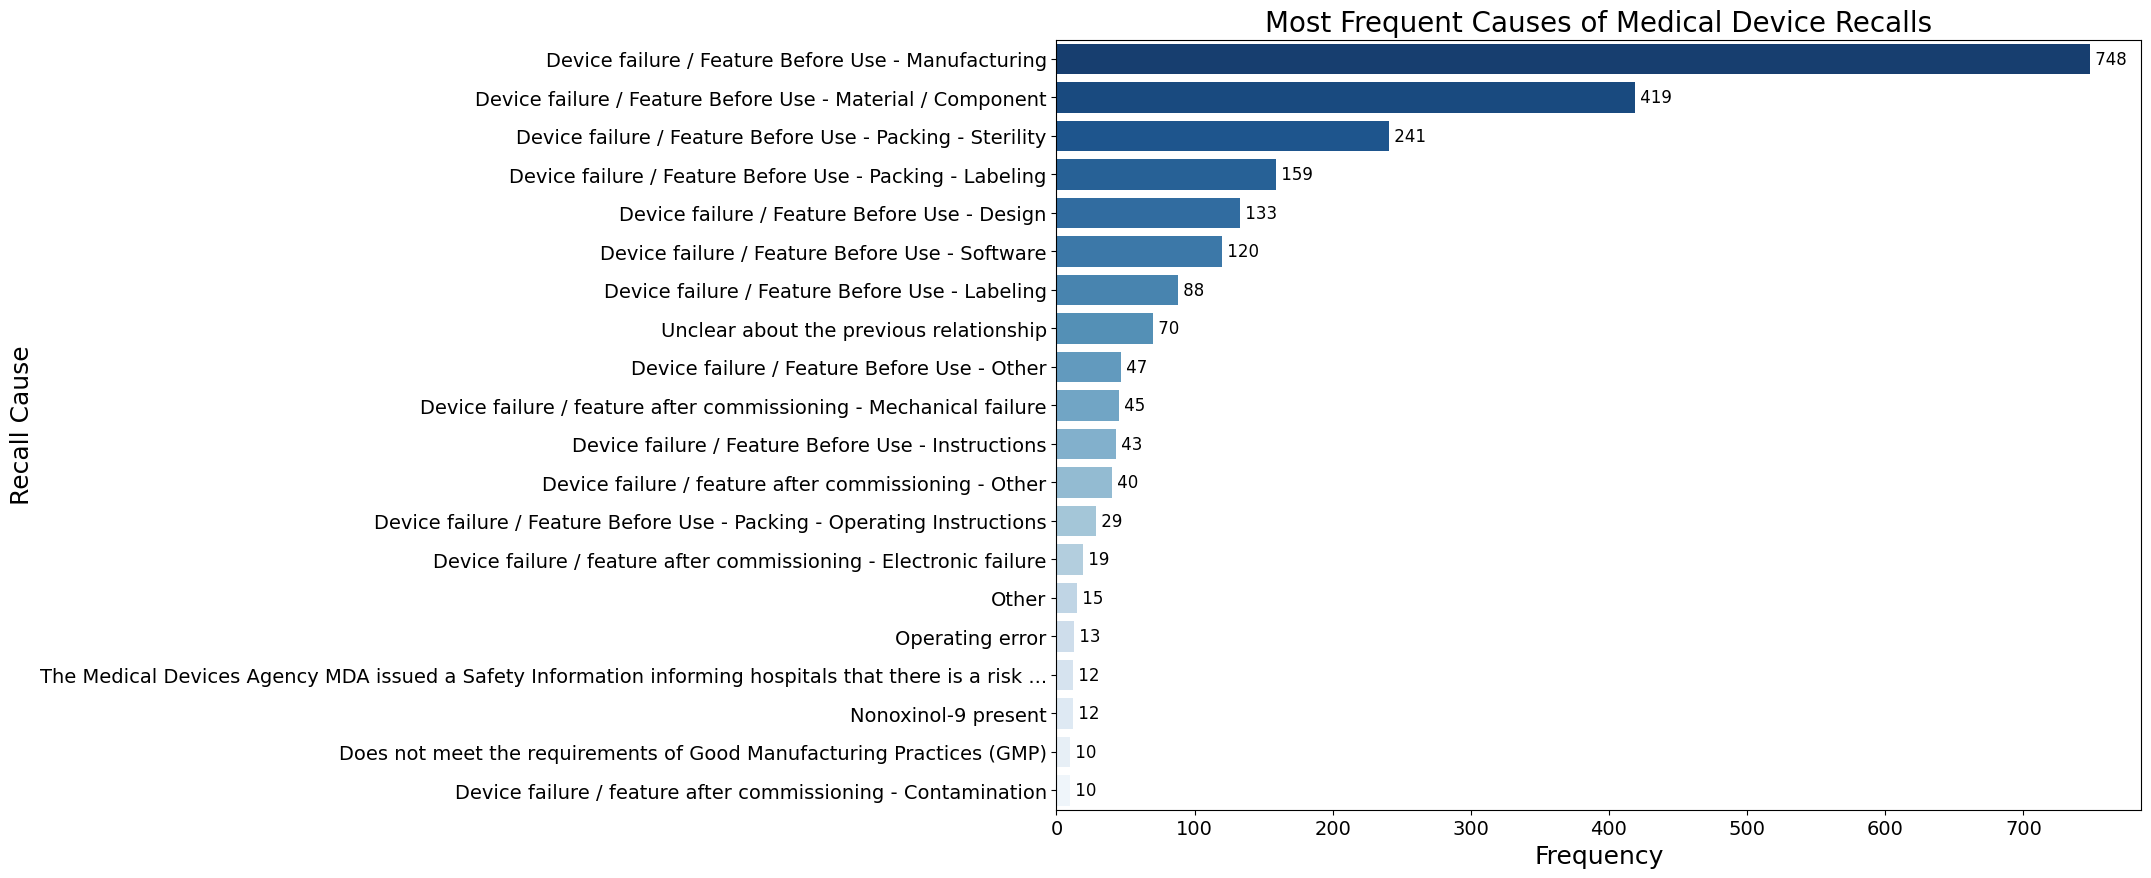

In [25]:
# Horizontal bar chart.

colors = sns.color_palette("Blues", len(top_recall_cause_counts))[::-1]
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x=top_recall_cause_counts.values, y=top_recall_cause_counts.index, palette=colors)

# Annotate each bar with the occurrence count.

for index, value in enumerate(top_recall_cause_counts.values):
    plt.text(value, index, f' {value}', va='center', ha='left', fontsize=12)

plt.title('Most Frequent Causes of Medical Device Recalls', fontsize=20)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Recall Cause', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From this visualization, one key finding that we can see when interpreting the different recall causes is that it appears most of the device failures happen before use due to different factors such as manufacturing, sterility, labeling, etc. An alternative visualization we can generate is a treemap to provide a comprehensive and hierarchical representation of the most common medical device recalls but this time, we will display three main categories:

   - "Device failure before use": Failures detected before the device is used.
   - "Device failure after use": Failures detected after the device has been used.
   - "Other": Miscellaneous other reasons that did not fit into the first two categories.
   
From the frequency analysis conducted earlier, we can manually count the frequency of each category and use these counts to generate the treemap. The ```plotly``` library is useful for generating this visualization as it offers an interactive component, although it will not be interactive when it is added to our project report slide deck.

Each label represents a node in the treemap, including both primary categories and specific recall causes. The parents define the hierarchical relationship between the notes. The values specify the size of each node based on the occurrence counts.

The ```go.Treemap``` object is configured with the labels, parents, and values defined. Updating the layout configuration allows us to adjust the parameters of the treemap such as the title, font sizes, plot dimension, and margin settings.

In [27]:
# Treemap visualization.

labels = ["Device failure before use", "Device failure after use", "Other",
          "Manufacturing", "Material / Component", "Packing - Sterility", "Packing - Labeling", "Design", "Software", "Labeling", "Instructions", "Mechanical failure", "Other failure", "Operating instructions failure", "Electronic failure", "General Other", "Operating error", "MDA Safety Information", "Nonoxinol-9", "GMP", "Contamination"]
parents = ["", "", "",
           "Device failure before use", "Device failure before use", "Device failure before use", "Device failure before use", "Device failure before use", "Device failure before use", "Device failure before use", "Device failure before use",
           "Device failure after use", "Device failure after use", "Device failure before use", "Device failure after use",
           "Other", "Other", "Other", "Other", "Other", "Other"]
values = [1940, 124, 82,
          748, 419, 241, 159, 133, 120, 88, 43,
          45, 40, 29, 19,
          15, 13, 12, 12, 10, 10]

fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=values,
    textinfo="label+value+percent entry",
    hoverinfo="label+value+percent entry",
    marker=dict(colors=values, colorscale='Blues'),
    textfont=dict(size=20) 
))

# Update layout.

fig.update_layout(
    title='Medical Device Recall Causes Treemap',
    title_font_size=24,
    autosize=True,
    width=1400, 
    height=900, 
    margin=dict(t=50, l=25, r=25, b=25),
    treemapcolorway=["#4477AA", "#CCBB44", "#DDCC77"],
)

fig.show()

The treemap displays three main categories: "Device failure before use," "Device failure after use," and "Other." Each main category contains its specific subcategories representing different specific causes within that group. The Viridis colorscale was used to color-code segments proportionally. The text within the boxes includes the label, value, and percentage of total entries. If the user hovers over segments, they can see detailed information about each category and subcategory which is effective for displaying the smaller portions of the treemap where the boxes are too small to read the category.

### Conclusion

By conducting this analysis and visualization, we were able to:
- Identify the most common causes of medical device recalls, highlighting areas that may require more stringent quality control or regulatory oversight.
- Provide clear visual representations of the frequency distribution of recall causes, facilitating easier interpretation and communication of the results.
- Inform stakeholders and decision-makers with actionable insights that can drive improvements in medical device safety and compliance, ultimately contributing to better patient outcomes and public health.

These analytical and visualization techniques not only revealed key insights into recall causes but also demonstrated the utility of data analysis in enhancing the safety and effectiveness of medical devices.